# WeatherPy
----

### Analysis
* Cities that are located within 20 degrees from equator in either direction have high temperatures. The further away you move from equator maximum temperature also drops. The data destribution of cities is leaning towards northen hemisphere, possibly because there is more land mass than in the southen hemisphere. 

* There is slight relationship between latitude and cloudiness. Cloudiness data produces interesting linear data showing higher coudiness density in northern hemisphere.

* There is some relationship between latitude and wind speed. Northern hemisphere cities have strong winds that can be over 20 mph.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude


In [11]:
# Create settings dictionary with information we're interested in
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

count = 1
weather_data = []

for city in cities:
    
    try:
        data = requests.get(f"{url}{api_key}&q={city}").json()
        weather_data.append(data)
        city_name = data["name"]
        print(f"record number {count} | city: {city_name}")
        count += 1
        
        time.sleep(1.01)
        
    except:
        print(f"City not found. Skipping... {count}")
    continue        
    

record number 1 | city: Adrar
record number 2 | city: Saint George
record number 3 | city: Upernavik
record number 4 | city: Chokurdakh
record number 5 | city: Atuona
record number 6 | city: Hithadhoo
record number 7 | city: Sao Joao da Barra
record number 8 | city: Kruisfontein
record number 9 | city: Geraldton
record number 10 | city: Cherskiy
record number 11 | city: Penzance
record number 12 | city: Siuna
record number 13 | city: Mar del Plata
record number 14 | city: Iseyin
City not found. Skipping... 15
record number 15 | city: Katsuura
record number 16 | city: Nanortalik
record number 17 | city: Nikolskoye
record number 18 | city: Fortuna
record number 19 | city: Cape Town
City not found. Skipping... 20
record number 20 | city: Sao Sebastiao
City not found. Skipping... 21
record number 21 | city: Airai
record number 22 | city: Tiksi
City not found. Skipping... 23
record number 23 | city: Mount Gambier
record number 24 | city: Albany
record number 25 | city: Jati
record number 26

record number 214 | city: Liwale
City not found. Skipping... 215
record number 215 | city: Maceio
City not found. Skipping... 216
record number 216 | city: Vardo
record number 217 | city: Lata
City not found. Skipping... 218
record number 218 | city: Bose
record number 219 | city: Pavlikeni
record number 220 | city: Flin Flon
City not found. Skipping... 221
record number 221 | city: Jardim
City not found. Skipping... 222
record number 222 | city: Ouro Preto do Oeste
record number 223 | city: Kamennomostskoye
record number 224 | city: Powell River
record number 225 | city: Mulege
record number 226 | city: Hay River
record number 227 | city: Gejiu
record number 228 | city: Loandjili
record number 229 | city: Carutapera
record number 230 | city: Kodiak
record number 231 | city: Gouloure
record number 232 | city: Lompoc
City not found. Skipping... 233
record number 233 | city: Denpasar
record number 234 | city: Camacha
record number 235 | city: Dingle
record number 236 | city: Maniitsoq
re

record number 420 | city: Mildura
record number 421 | city: Magistralnyy
record number 422 | city: College
record number 423 | city: Mana
record number 424 | city: Orbetello
City not found. Skipping... 425
record number 425 | city: Chimbote
record number 426 | city: Dhidhdhoo
City not found. Skipping... 427
record number 427 | city: Shelburne
record number 428 | city: Bontang
record number 429 | city: Qandala
record number 430 | city: Flinders
record number 431 | city: Farmington
record number 432 | city: Saldanha
record number 433 | city: Ketchikan
record number 434 | city: Leova
record number 435 | city: Thunder Bay
record number 436 | city: Moffat
record number 437 | city: Bijar
record number 438 | city: Pipri
record number 439 | city: Indramayu
record number 440 | city: Ostrovnoy
record number 441 | city: Warrington
record number 442 | city: Okha
record number 443 | city: Nuristan
record number 444 | city: Coahuayana
record number 445 | city: Praya
record number 446 | city: Pevek
r

In [15]:
len(weather_data) # len 611

543

In [14]:
# drop values that failed to retrieve data from API
i = 0
for i in range(len(weather_data)): 
    if weather_data[i]['cod'] == '404': 
        del weather_data[i] 
        i += 1

IndexError: list index out of range

In [17]:
len(weather_data) # sould be less than 611 | after cleanup 543

543

In [18]:
from pandas.io.json import json_normalize

all_df = pd.DataFrame.from_dict(json_normalize(weather_data), orient='columns')
all_df.head()

,base,clouds.all,cod,coord.lat,coord.lon,dt,id,main.grnd_level,main.humidity,main.pressure,...,sys.id,sys.message,sys.sunrise,sys.sunset,sys.type,visibility,weather,wind.deg,wind.gust,wind.speed
0,stations,0,200,27.87,-0.29,1556931600,2508813,NaN,16,1006.00,...,1098.0,0.0044,1556947160,1556994989,1.0,10000.0,"[{'id': 800, 'main': 'Clear', 'description': '...",200.000,NaN,4.70
1,stations,75,200,39.45,22.34,1556931000,262462,NaN,76,1010.00,...,6629.0,0.0054,1556940521,1556990767,1.0,10000.0,"[{'id': 803, 'main': 'Clouds', 'description': ...",304.081,NaN,2.46
2,stations,46,200,72.79,-56.15,1556935736,3418910,1022.19,88,1022.51,...,NaN,0.0044,1556944518,1557024443,NaN,NaN,"[{'id': 802, 'main': 'Clouds', 'description': ...",346.476,NaN,13.29
3,stations,92,200,70.62,147.90,1556936046,2126123,1013.57,94,1015.34,...,NaN,0.0047,1556899995,1556971028,NaN,NaN,"[{'id': 804, 'main': 'Clouds', 'description': ...",214.559,NaN,6.42
4,stations,0,200,-9.80,-139.03,1556935735,4020109,1009.94,79,1009.94,...,NaN,0.0049,1556896834,1556939118,NaN,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...",96.873,NaN,17.11


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# convert nested list of json data to dataframe
from pandas.io.json import json_normalize

all_df = pd.DataFrame.from_dict(json_normalize(weather_data), orient='columns')
all_df.head()

# selecting only the data that we need
select_df = all_df[['id','sys.country', 'name', 'dt', 'coord.lat', 'coord.lon',
                    'main.temp_max', 'wind.speed','main.humidity', 'clouds.all']]
# rename columns
select_df.columns = ["id", "country", "city", "date", "lattitude", "longitude", "max_temp", 
                                     "wind_speed", "humidity", "cloudiness"]
# drop any record that has humidity higher than 100%
select_df = select_df.drop(select_df[select_df['humidity'] >= 101].index)

select_df.to_csv(output_data_file, index=False)

select_df.count()

id            543
country       543
city          543
date          543
lattitude     543
longitude     543
max_temp      543
wind_speed    543
humidity      543
cloudiness    543
dtype: int64

In [ ]:
select_df.head()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

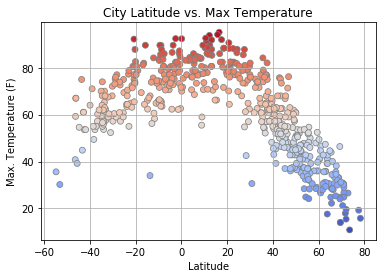

C:\Users\hamst\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


In [20]:
fig = sns.scatterplot(x="lattitude", y="max_temp", data=select_df,
                     hue="max_temp",  edgecolor='gray',
                     palette="coolwarm", legend=False)
fig.grid(b=True, which='major')
fig.grid(b=True, which='minor')

plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (F)")
plt.title("City Latitude vs. Max Temperature") 
plt.show(fig)

plot = fig.get_figure()

plot.savefig("output_data/figures/Max_Temp_vs_Latitude.png")

plot.show(fig)

#### Latitude vs. Humidity Plot

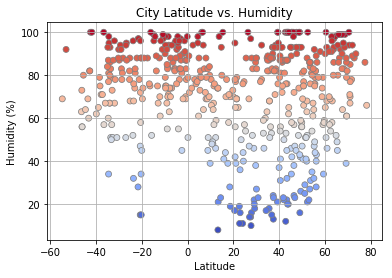

In [21]:
fig = sns.scatterplot(x="lattitude", y="humidity", data=select_df,
                     hue="humidity",  edgecolor='gray',
                     palette="coolwarm", legend=False)
fig.grid(b=True, which='major')
fig.grid(b=True, which='minor')

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity") 
plt.show(fig)

plot = fig.get_figure()

plot.savefig("output_data/figures/Max_Temp_vs_Humidity.png")

plot.show(fig)

#### Latitude vs. Cloudiness Plot

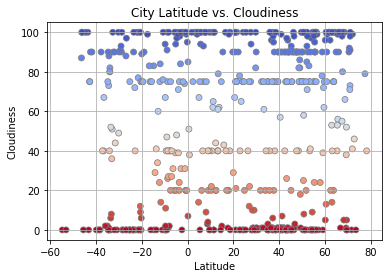

In [22]:
fig = sns.scatterplot(x="lattitude", y="cloudiness", data=select_df,
                     hue="cloudiness",  edgecolor='gray',
                     palette="coolwarm_r", legend=False)
fig.grid(b=True, which='major')
fig.grid(b=True, which='minor')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness") 
plt.show(fig)

plot = fig.get_figure()

plot.savefig("output_data/figures/Max_Temp_vs_Cloudiness.png")

plot.show(fig)

#### Latitude vs. Wind Speed Plot

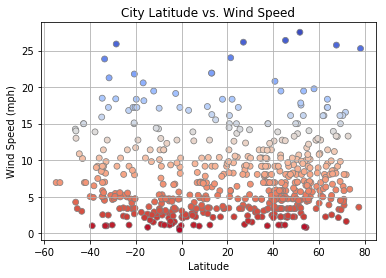

In [23]:
fig = sns.scatterplot(x="lattitude", y="wind_speed", data=select_df,
                     hue="wind_speed",  edgecolor='gray',
                     palette="coolwarm_r", legend=False)
fig.grid(b=True, which='major')
fig.grid(b=True, which='minor')

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed") 
plt.show(fig)

plot = fig.get_figure()

plot.savefig("output_data/figures/Max_Temp_vs_Wind.png")

plot.show(fig)